<a href="https://colab.research.google.com/github/hank199599/data_science_from_scratch_reading_log/blob/main/Chapter8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

進行這專案前，需要引用第四章的向量定義以及相關運算來進行初始化

In [2]:
from typing import List
import math

Vector = List[float]

def subtrate( v:Vector, w:Vector) -> Vector:
  assert len(v) == len(w) #兩個向量必須有相同的維度

  return [ v_i-w_i for v_i,w_i in zip(v,w)]

def dot(v:Vector,w:Vector)->float:
  #計算v_1*w_1+... +v_n*w_n
  assert len(v)==len(w),"兩個向量必須有相同的維度"

  return sum(v_i*w_i for v_i,w_i in zip(v,w))

def sum_of_squares(v:Vector) -> float:
  return dot(v,v)

def squared_distance(v:Vector,w:Vector) -> float:
  return sum_of_squares(subtrate(v,w))

def distance(v:Vector,w:Vector) -> float:
  return math.sqrt(squared_distance(v,w))

def add( v:Vector, w:Vector) -> Vector:
  assert len(v) == len(w) ,"兩個向量必須有相同的維度"

  return [ v_i+w_i for v_i,w_i in zip(v,w)]

def scalar_multiply(c:float,v:Vector) -> Vector:
  return [c*v_i for v_i in v]

def vector_mean(vectors:List[Vector])->Vector:
  n=len(vectors)
  return scalar_multiply(1/n,vector_sum(vectors))

def vector_sum(vectors:List[Vector]) -> Vector:
  #先檢查vertors這個向量列表是否為空
  assert vectors,"列表中沒有向量!"

  #檢查vertors 向量列表內的所有向量都具有相同的維度
  num_elements=len(vectors[0])
  assert all(len(v)==num_elements for v in vectors),"向量維度不一致"

  #所有vectors[i]相加起來，是結果的第i個元素值
  return [sum(vector[i] for vector in vectors) for i in range(num_elements)]

# 梯度遞減(gradient descent)
用於找出某個輸入值v，使函數得出的最大值(或最小值)的可能值

In [3]:
def sum_of_square(v:Vector)->float:
  """計算v之中的平方和"""
  return dot(v,v)

## 梯度(*gradient*)：向量的偏導數
  
欲求出函數的**最大值**：
1. 取個隨機的起始點
2. 計算其梯度
3. 沿著梯度方向(即函數增長最多的方向)移動一小步

欲求出函數的**最小值**： 
1. 取個隨機的起始點
2. 計算其梯度
3. 沿著梯度**反方向**移動一小步

### 圖8-1  利用梯度遞減的概念，來找出最小值
![pic 8-1](https://github.com/hank199599/data_science_from_scratch_reading_log/blob/main/pictures/8-1.png?raw=true)
  
如果函數只有一個局域最小值，則我們能輕易找到這個值，但如果函數有好幾個極小值,就有可能找錯點。  
如果函數根本沒有最小值，則會陷入無限迴圈。

# 梯度的估算

如果f函數只有一個變數  
在點X所謂的導數(derivative)就是衡量x出現微小變化時f(x)跟著變化的程度。

導數可以定義為商差(difference quotient)的極限：  
其中h趨近於0

In [4]:
from typing import Callable

def difference_quotient(f:Callable[[float],float],x:float,h:float)->float:
  return (f(x+h)-f(x))/h

### 圖8-2 利用商差的定義來趨近導數的定義
導數就是(x,f(x))這個點的切線斜率，  
而商差則是穿越(x,f(x))和(x+h,f(x+h))這兩點的割線斜率。  
隨著h趨近於0，割線與切線會越來越近。
  
![pic 8-2](https://github.com/hank199599/data_science_from_scratch_reading_log/blob/main/pictures/8-2.png?raw=true)

## 範例：平方函數

In [5]:
#平方函數
def square(x:float)->float:
  return x*x

In [6]:
#平方函數的導數
def devivative(x:float)->float:
  return 2*x

### 圖8-3 利用商差獲取導數的結果

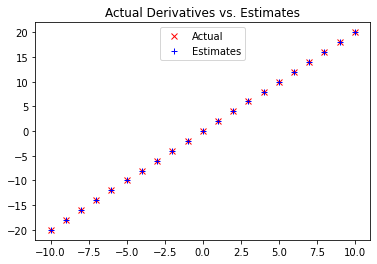

In [7]:
xs = range(-10,11)
actuals =[devivative(x) for x in xs]
estimates = [difference_quotient(square,x,h=0.001) for x in xs]

#畫出圖形來比較兩者
import matplotlib.pyplot as plt
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals ,'rx',label='Actual')    #用紅色x表示
plt.plot(xs, estimates ,'b+',label='Estimates') #用藍色+表示
plt.legend(loc=9)
plt.show()

## 偏導數
如果f是個多變數函數，就會有多個偏導數

In [8]:
def partitial_difference_quotient(f:Callable[[float],float],v:Vector,i:int,h:float) ->float:
  """送回f在v中第i個元素所對應的差商"""
  w = [v_j + (h if i else 0) for i in range(len(v))]
  return (f(w)-f(v))/ h

### 利用商差估計梯度
缺點是對於計算能力要求很高，  
若v有n個元素，則會進行2n個運算

In [9]:
def estimate_gradient(f:Callable[[float],float],v:Vector,h:float = 0.0001):
  return [partial_difference_quotient(f,v,i,h) for i in range(len(v))]

# 梯度的應用

透過梯度遞減，在眾多三維向量中試著求出最小值。  
1. 以隨機方式挑出一個起始點
2. 沿著梯度的反方向移動一小步
3. 重複動作1.2.直到梯度變得非常小為止

In [10]:
import random

def gradient_step(v:Vector,gradient:Vector,step_size:float) -> Vector:
  """從v沿著gradient的方向移動step_size的距離"""
  assert len(v) == len(gradient)
  step = scalar_multiply(step_size,gradient)
  return add(v,step)

def sum_of_squares_gradient(v:Vector) -> Vector:
  return [2*v_i for v_i in v]

#取個隨機起點
v = [random.uniform(-10,10) for i in range(3)]

for epoch in range(1000):
  grad = sum_of_squares_gradient(v) # 計算出v所對應的梯度
  v = gradient_step(v,grad,-0.01)  # 往梯度的負方向跨一小步
  print(epoch,v)

assert distance(v,[0,0,0]) < 0.001  # v應該會很接近0



0 [-1.949082988243228, -1.0766687609913053, 8.822606480865495]
1 [-1.9101013284783634, -1.0551353857714791, 8.646154351248185]
2 [-1.8718993019087962, -1.0340326780560496, 8.473231264223221]
3 [-1.8344613158706202, -1.0133520244949286, 8.303766638938757]
4 [-1.7977720895532079, -0.99308498400503, 8.137691306159983]
5 [-1.7618166477621438, -0.9732232843249293, 7.974937480036783]
6 [-1.7265803148069008, -0.9537588186384307, 7.815438730436048]
7 [-1.6920487085107627, -0.9346836422656621, 7.659129955827327]
8 [-1.6582077343405475, -0.9159899694203489, 7.50594735671078]
9 [-1.6250435796537366, -0.8976701700319419, 7.3558284095765645]
10 [-1.5925427080606618, -0.879716766631303, 7.208711841385033]
11 [-1.5606918538994485, -0.8621224312986769, 7.064537604557332]
12 [-1.5294780168214595, -0.8448799826727034, 6.923246852466185]
13 [-1.4988884564850302, -0.8279823830192493, 6.784781915416862]
14 [-1.4689106873553297, -0.8114227353588643, 6.649086277108525]
15 [-1.4395324736082231, -0.79519428065

隨著執行的階段越多，v就越靠近[0,0,0]

## 選擇正確的跨步間隔
* 使用固定的間隔
* 隨時間逐漸縮小間隔
* 每個步驟都重新能夠讓目標函數數值最小化的間隔

# 利用梯度遞減的做法來套入模型
運用梯度遞減的做法把參數化模型套入到資料中，這些模型通常具有一個或多個參數。這些可微分的參數負責維繫著模型與資料間的關係。並搭配一個**損失函數(loss function)**來衡量模型與資料的匹配程度。

In [11]:
inputs = [(x,20*x+5) for x in range(-50,50)]

In [12]:
def linear_gradient(x:float,y:float,theta:Vector) ->Vector:
  slope,intercept = theta
  predicted = slope * x + intercept # 模型的預測值
  error = (predicted - y)       # 誤差為(預測值-實際值)
  squared_error = error**2       # 我們要設法最小化平方誤差
  grad = [2*error*x,2*error]      # 過程中會用到梯度值
  return grad

針對整個資料集，查看軍方差的值。  
而均方差的梯度值，其實就是各個梯度值的平均值。  
  
1. 首先從一組隨機的theta值開始
2. 計算出梯度的隨機值
3. 沿著梯度方向調整theta參數值
4. 重複步驟2、3的動作。

經過很多階段(epoch)之後，就能慢慢地學習得出正確的參數值：

In [13]:
#首先用一組隨機值，最為斜率與截距的起始值
theta = [random.uniform(-1,1),random.uniform(-1,1)]

learning_rate = 0.001

for epoch in range(5000):
  #計算梯度的平均值
  grad = vector_mean([linear_gradient(x,y,theta) for x,y in inputs])
  #延梯度方向移動一步
  theta = gradient_step(theta,grad,-learning_rate)
  print(epoch,theta)

slope,intercept = theta

print("斜率：",slope)
print("截距：",intercept)

串流輸出內容已截斷至最後 5000 行。
2 [26.20546012967717, 0.19733372297037666]
3 [15.856155427228297, 0.2131445156541131]
4 [22.759157474554385, 0.21857438205003316]
5 [18.154860538854273, 0.23089639076048749]
6 [21.22593891697496, 0.23858945851782082]
7 [19.17753733183622, 0.24933821851776014]
8 [20.54383193788376, 0.2580170794125608]
9 [19.632522114510945, 0.26804487719161946]
10 [20.24037579449839, 0.27714130955174715]
11 [19.834946486379124, 0.286827402727142]
12 [20.10537752098785, 0.2960886944080669]
13 [19.92500928219551, 0.30560189454023867]
14 [20.045324410670133, 0.3149157000333537]
15 [19.965083533783055, 0.32433119304395713]
16 [20.018613614159747, 0.3336476141916523]
17 [19.982918366969642, 0.3429989325774287]
18 [20.006736448163824, 0.3522958530792435]
19 [19.99085908492781, 0.36159799782124885]
20 [20.00145858835097, 0.37086566091053413]
21 [19.994397987230812, 0.38012538817706404]
22 [19.999116667905227, 0.38935953538794077]
23 [19.9959785420426, 0.3985799329850701]
24 [19.99808089239

# 小批量梯度遞減 (minibatch gradient descent)
自較大的資料集取出小批量資料，再根據小批量資料計算相應的梯度值。(然後再沿著這個梯度方向更新參數值)

In [14]:
from typing import TypeVar , List , Iterator

T = TypeVar('T') #用他建立「各種型別皆可使用的」函式

def minibatches(dataset:List[T],
         batch_size:int,
         shuffle:bool=True)->Iterator[List[T]]:
  """自資料集中取出大小為batch_size的小批量資料"""
  #起始索引值分別為0、batch_size、2*batch_size
  batch_starts = [start for start in range(0,len(dataset),batch_size)]
  if shuffle:random.shuffle(batch_starts) #打亂批量資料順序

  for start in batch_starts:
    end = start + batch_size
    yield dataset[start:end]

TypeVar(T)能被用來建立一個「各種型別皆可使用的」函式，輸入跟輸出都必須是相同的型別

In [15]:
theta = [random.uniform(-1,1),random.uniform(-1,1)]

for epoch in range(1000):
  for batch in minibatches(inputs,batch_size=20):
    grad = vector_mean([linear_gradient(x,y,theta) for x,y in batch])
    theta = gradient_step(theta,grad,-learning_rate)
  print(epoch,theta)

slope,intercept = theta

print("斜率：",slope)
print("截距：",intercept)

0 [19.59315248783059, -2.6494018910754096]
1 [19.87533617450779, -2.6516765773647424]
2 [19.536527936416213, -2.628370086805653]
3 [19.663287911393937, -2.249973530113294]
4 [16.679802438365588, -2.0401411105174185]
5 [21.135009265933803, -1.8389231240813022]
6 [20.553595963743994, -1.8288944918638212]
7 [20.273050827500224, -1.4097284217768273]
8 [20.022373087936987, -1.1207920468721655]
9 [20.296338989805076, -1.0967712198466097]
10 [20.37727341907793, -1.05581511321774]
11 [20.11730770039575, -1.0624878181688375]
12 [19.761602286061667, -0.9545650531619534]
13 [19.38618565070151, -0.905503053953219]
14 [20.92821354996163, -0.9013457299455074]
15 [21.260008034503343, -0.8733471014713635]
16 [20.994996871497776, -0.5759200773888586]
17 [20.229847034839306, -0.588862215691077]
18 [19.77083043448804, -0.33595818389825527]
19 [19.7461413483649, -0.09397065834170362]
20 [19.67861283086206, -0.07915519699745543]
21 [20.031230841293606, -0.047234080480167445]
22 [19.245897159753632, 0.03313

## 隨機梯度遞減(stochastic gradient descent)
一次只使用一個訓練樣本，以計算相應的梯度並沿該方向更新參數值。

In [16]:
theta = [random.uniform(-1,1),random.uniform(-1,1)]

for epoch in range(1000):
  for x,y in inputs:
    grad = linear_gradient(x,y,theta)
    theta = gradient_step(theta,grad,-learning_rate)
  print(epoch,theta)

slope,intercept = theta

print("斜率：",slope)
print("截距：",intercept)

0 [20.118367294903095, -0.8913950206892085]
1 [20.113288272813065, -0.6386319932620735]
2 [20.108427780922522, -0.3967134629721576]
3 [20.10377581673523, -0.1651741480198209]
4 [20.099323442056484, 0.05643125894901236]
5 [20.09506208923505, 0.26852895996986675]
6 [20.090983571955785, 0.47152687153938083]
7 [20.087080049669204, 0.665815409233984]
8 [20.083343976424175, 0.8517682376121887]
9 [20.079768199669573, 1.0297429895669707]
10 [20.076345848251794, 1.2000819549294512]
11 [20.073070327825796, 1.3631127378840668]
12 [20.069935325442707, 1.519148886620751]
13 [20.06693484980777, 1.6684904974938155]
14 [20.064063095134102, 1.8114247916139898]
15 [20.06131455014728, 1.9482266667404535]
16 [20.058683923127937, 2.0791592266425614]
17 [20.05616616811495, 2.204474287106183]
18 [20.0537564174954, 2.324412859823437]
19 [20.051450050286622, 2.439205615929889]
20 [20.049242666005682, 2.549073330916899]
21 [20.04712997067007, 2.6542273078358196]
22 [20.04510791343757, 2.7548697833676807]
23 [20